This first example is just following the simple quickstart example on the cobaya website. Here I explore what the parameters here do.

In [1]:
# Use dictionaries to define parameters of a distribution
info = {
    "likelihood": {
        "gaussian_mixture": {
            "means": [0.2, 0],
            "covs": [[0.1, 0.05],
                     [0.05, 0.2]],
            "derived": True}},
    "params": dict([
        ("a", {
            "prior": {"min": -0.5, "max": 3},
            "latex": r"\alpha"}),
        ("b", {
            "prior": {"dist": "norm", "loc": 0, "scale": 1},
            "ref": 0,
            "proposal": 0.5,
            "latex": r"\beta"}),
        ("derived_a", {
            "latex": r"\alpha^\prime"}),
        ("derived_b", {
            "latex": r"\beta^\prime"})]),
    "sampler": {
        "mcmc": None}}

Now the sample can be run.

In [2]:
from cobaya.run import run

updated_info, sampler = run(info)

[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 10900.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: a:0.9236712, b:0
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-30 16:33:45 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.200
[mcmc]  - Convergence of means: R-1 = 0.331082 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0

[root] *WARNING* outlier fraction 0.005833333333333334 
Mean:
[ 0.21391894 -0.0170903 ]
Covariance matrix:
[[0.08792608 0.03268832]
 [0.03268832 0.16057419]]


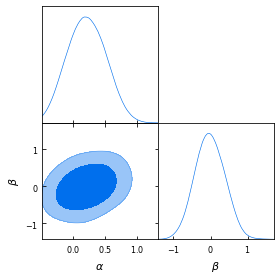

In [3]:
# Export the results to GetDist
from getdist.mcsamples import MCSamplesFromCobaya

gd_sample = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
# Analyze and plot
mean = gd_sample.getMeans()[:2]
covmat = gd_sample.getCovMat().matrix[:2, :2]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
%matplotlib inline
import getdist.plots as gdplt

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample, ["a", "b"], filled=True)

[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 12300.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: a:0.8956074, b:0
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-30 16:33:48 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.213
[mcmc]  - Convergence of means: R-1 = 0.373301 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0

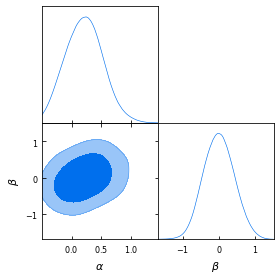

In [4]:
updated_info, sampler = run(info)

# Export the results to GetDist
from getdist.mcsamples import MCSamplesFromCobaya

gd_sample = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
# Analyze and plot
mean = gd_sample.getMeans()[:2]
covmat = gd_sample.getCovMat().matrix[:2, :2]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
%matplotlib inline
import getdist.plots as gdplt

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample, ["a", "b"], filled=True)

Now I will change means and covariance and see what happens

[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 11600.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: a:0.2141337, b:0
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-30 16:33:52 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.182
[mcmc]  - Convergence of means: R-1 = 0.278856 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0

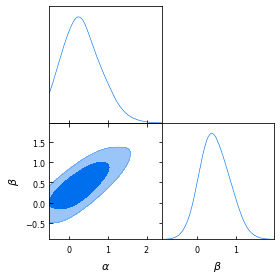

In [5]:
# Use dictionaries to define parameters of a distribution
info2 = {
    "likelihood": {
        "gaussian_mixture": {
            "means": [0.4, 0.5],
            "covs": [[0.3, 0.1],
                     [0.2, 0.2]],
            "derived": True}},
    "params": dict([
        ("a", {
            "prior": {"min": -0.5, "max": 3},
            "latex": r"\alpha"}),
        ("b", {
            "prior": {"dist": "norm", "loc": 0, "scale": 1},
            "ref": 0,
            "proposal": 0.5,
            "latex": r"\beta"}),
        ("derived_a", {
            "latex": r"\alpha^\prime"}),
        ("derived_b", {
            "latex": r"\beta^\prime"})]),
    "sampler": {
        "mcmc": None}}

updated_info2, sampler2 = run(info2)

# Export the results to GetDist
from getdist.mcsamples import MCSamplesFromCobaya

gd_sample = MCSamplesFromCobaya(updated_info2, sampler2.products()["sample"])
# Analyze and plot
mean = gd_sample.getMeans()[:2]
covmat = gd_sample.getCovMat().matrix[:2, :2]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
%matplotlib inline
import getdist.plots as gdplt

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample, ["a", "b"], filled=True)

I have been trying to read about the reason MCMC is not sufficient on its own. It could be due to decreasing computational efficiency as the distributions become more complicated. In the paper (https://arxiv.org/pdf/2105.03324.pdf) the normalizing flow seem s to converge much faster than KDE, presumably becuase normalizing flows can sample from a simple distribution and push forward the samples to the posterior.

To try to see this, I will first use the example from the cobay website for a Gaussian ring. Then I will try adjusting the prior distribution to see what happens to the rate of convergence.

[ring] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {ring: 3790.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: x:0.5, y:0.5
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-30 16:33:55 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.660
[mcmc]  - Convergence of means: R-1 = 1.427075 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.490
[mcmc]  - Convergence of means: R-1 = 6.020144 after 128 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 240 samples accepted.
[mcmc]  - Acceptance rate: 0.416

[mcmc] Learn + convergence test @ 2960 samples accepted.
[mcmc]  - Acceptance rate: 0.095
[mcmc]  - Convergence of means: R-1 = 0.029301 after 2368 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3040 samples accepted.
[mcmc]  - Acceptance rate: 0.094
[mcmc]  - Convergence of means: R-1 = 0.022467 after 2432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3120 samples accepted.
[mcmc]  - Acceptance rate: 0.094
[mcmc]  - Convergence of means: R-1 = 0.018574 after 2496 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3200 samples accepted.
[mcmc]  - Acceptance rate: 0.094
[mcmc]  - Convergence of means: R-1 = 0.013518 after 2560 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3280 samples accepted.
[mcmc]  - Acceptance rate: 0.093
[mcmc]  - Convergence of means: R-1 = 0.018986

[mcmc] Learn + convergence test @ 6000 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.004140 after 4800 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6080 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.003348 after 4864 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6160 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.001845 after 4928 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6240 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.002304 after 4992 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6320 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.003722

[mcmc] Learn + convergence test @ 9040 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.003008 after 7232 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9120 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.003995 after 7296 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9200 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.003458 after 7360 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9280 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.003064 after 7424 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9360 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.002582

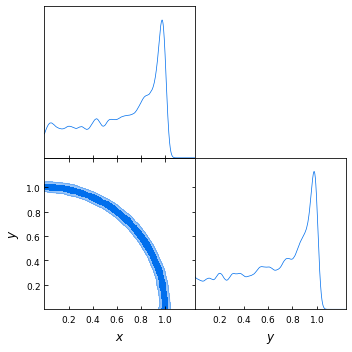

In [6]:
import numpy as np
from scipy import stats

def gauss_ring_logp(x, y, mean_radius=1, std=0.02):
    """
    Defines a gaussian ring likelihood on cartesian coordinater,
    around some ``mean_radius`` and with some ``std``.
    """
    return stats.norm.logpdf(np.sqrt(x**2 + y**2), loc=mean_radius, scale=std)

info = {"likelihood": {"ring": gauss_ring_logp}}

info["params"] = {
    "x": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01},
    "y": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01}}

info["sampler"] = {"mcmc": {"Rminus1_stop": 0.01, "max_tries": 1000}}

from cobaya.run import run
updated_info, sampler = run(info)

from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt

gdsamples = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples, ["x", "y"], filled=True)

Now lets start implementing a normalizing flow. For this example I will use two gaussian likelihoods and a uniform prior.

[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 10900.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: a:-0.8731985, b:0
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-30 23:21:54 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.282
[mcmc]  - Convergence of means: R-1 = 0.138788 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 

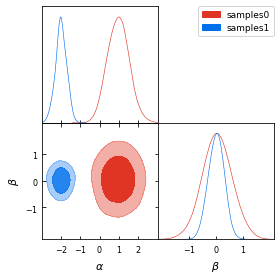

In [193]:
# Use dictionaries to define parameters of a distribution
info1 = {
    "likelihood": {
        "gaussian_mixture": {
            "means": [1, 0],
            "covs": [[0.3, 0.0],
                     [0.0, 0.3]],
            "derived": True}},
    "params": dict([
        ("a", {
            "prior": {"min": -3, "max": 3},
            "latex": r"\alpha"}),
        ("b", {
            "prior": {"min": -3, "max": 3},
            "ref": 0,
            "proposal": 0.5,
            "latex": r"\beta"}),
        ("derived_a", {
            "latex": r"\alpha^\prime"}),
        ("derived_b", {
            "latex": r"\beta^\prime"})]),
    "sampler": {
        "mcmc": {"Rminus1_stop": 0.01, "max_tries": 1000}}}

info2 = {
    "likelihood": {
        "gaussian_mixture": {
            "means": [-2, 0],
            "covs": [[0.1, 0.0],
                     [0.0, 0.1]],
            "derived": True}},
    "params": dict([
        ("a", {
            "prior": {"min": -3, "max": 3},
            "latex": r"\alpha"}),
        ("b", {
            "prior": {"min": -3, "max": 3},
            "ref": 0,
            "proposal": 0.5,
            "latex": r"\beta"}),
        ("derived_a", {
            "latex": r"\alpha^\prime"}),
        ("derived_b", {
            "latex": r"\beta^\prime"})]),
    "sampler": {
        "mcmc": {"Rminus1_stop": 0.01, "max_tries": 1000}}}

updated_info1, sampler1 = run(info1)
updated_info2, sampler2 = run(info2)

gdsamples1 = MCSamplesFromCobaya(updated_info1, sampler1.products()["sample"])
gdsamples2 = MCSamplesFromCobaya(updated_info2, sampler2.products()["sample"])
gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot([gdsamples1,gdsamples2], ["a", "b"], filled=True)

Now set up the parameter difference distribution. (I'm not completely sure this is the right way to do this. In the paper it says they did a numerical integration, however I'm not sure how to iplement that)

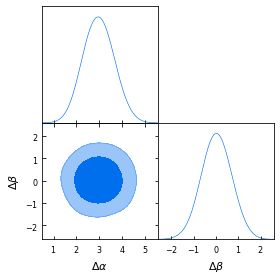

In [194]:
a1 = gdsamples1['a']
b1 = gdsamples1['b']
a2 = gdsamples2['a']
b2 = gdsamples2['b']

diff_a = np.zeros([len(a1),len(a2)])
diff_b = np.zeros([len(b1),len(b2)])

for idx1 in range(len(a1)):
    for idx2 in range(len(a2)):
        diff_a[idx1][idx2] = a1[idx1]-a2[idx2]
        pass
    pass

for idx1 in range(len(b1)):
    for idx2 in range(len(b2)):
        diff_b[idx1][idx2] = b1[idx1]-b2[idx2]
        pass
    pass
   
diff_a = diff_a.flatten()
diff_b = diff_b.flatten()

from getdist.mcsamples import MCSamples

diff = MCSamples(samples = [diff_a,diff_b],names=['da','db'], labels=['\\Delta \\alpha','\\Delta \\beta'])

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(diff, ["da", "db"], filled=True)

Now for the flow. It should only shift to the left by 3, so I only use one MAF and 5 epochs.

In [195]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

import tensorflow as tf
import tensorflow_probability as tfp
tfb = tfp.bijectors
tfd = tfp.distributions
tfk = tf.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import Callback

class Callback(tfk.callbacks.Callback):
    def on_train_begin(self, logs=None):
        #self._loss = []
        #self._epoch = []
        #self.is_epoch1 = True
        print("Starting training...")

    def on_epoch_begin(self, epoch, logs=None):
        print("Begin Epoch {}...".format(epoch))

    def on_epoch_end(self, epoch, logs=None):
        '''
        self._loss.append(logs['loss'])
        self._epoch.append(epoch+1)
        #clear_output(wait=True)
        plt.plot(self._epoch,self._loss)
        if(self.is_epoch1 == True):
            plt.show()
            plt.update()
            self.is_epoch1 == False
        else:
            plt.update()
        '''
        print("End Epoch {}. Loss = {:5.5f}. Validation loss = {:5.5f}".format(epoch,logs['loss'],logs['val_loss']))


Starting training...
Begin Epoch 0...
End Epoch 0. Loss = 2.88569. Validation loss = 2.08297
Begin Epoch 1...
End Epoch 1. Loss = 2.05781. Validation loss = 2.08279
Begin Epoch 2...
End Epoch 2. Loss = 2.05446. Validation loss = 2.08346
Begin Epoch 3...
End Epoch 3. Loss = 2.05552. Validation loss = 2.08095
Begin Epoch 4...
End Epoch 4. Loss = 2.05597. Validation loss = 2.08084


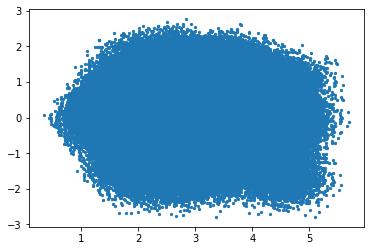

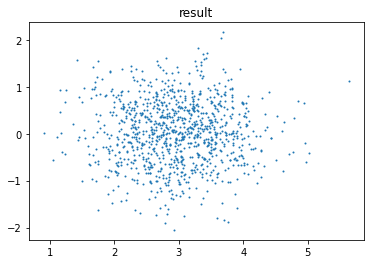

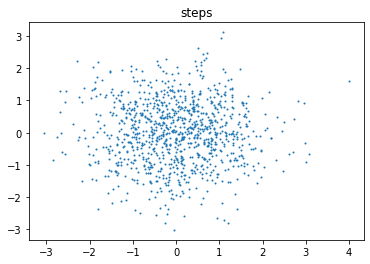

In [196]:
def sample(n,dist):
    p = dist.sample(n)
    px = p[...,0]
    py = p[...,1]
    return (px,py,p)
    
def train(base,X,Y,n_maf,n,batch_size,permute,n_epochs):
    nsamples=n
    ## NN setup
    # Set up bijector MADE
    made = tfb.AutoregressiveNetwork(params=2, hidden_units=[12,12], activation=tf.math.asinh, kernel_initializer='glorot_uniform')
    bijectors=[]
    if(permute==True):
        _permutations = [np.random.permutation(2) for _ in range(n_maf)]
    else:
        _permutations=False
    
    for i in range(n_maf):
        # the permutation part comes from the code M. Raveri wrote,
        # The x direction does not want to separate, so I want to see if permuting the input can help
        if _permutations:
            #print(_permutations[i])
            bijectors.append(tfb.Permute(_permutations[i].astype(np.int32)))
        # rest by myself
        bijectors.append(tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn=made))
        
    target_distribution = tfd.TransformedDistribution(
        distribution=tfd.Sample(base),
        bijector=tfb.Chain(bijectors)) 

    
    # now perform the fit
    xdata = np.stack([X, Y], axis=-1)
    ydata = base.sample(nsamples)
    #print(data)
    plt.scatter(X,Y,s=5)

    # Construct model.
    x_ = tfk.Input(shape=(2,), dtype=tf.float32)
    log_prob_ = target_distribution.log_prob(x_)
    model = tfk.Model(x_, log_prob_)

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
                  loss=lambda _, log_prob: -log_prob) 

    loss_plot = []
    #batch_size = 1000
    model.fit(x=xdata,
              y=np.zeros((int(2*nsamples), 2), dtype=np.float32),
              batch_size=batch_size,
              epochs=n_epochs,
              steps_per_epoch=n/(2*batch_size),  # Usually `n // batch_size`.
              validation_split=0.2,
              shuffle=True,
              verbose=False,
              callbacks=[Callback()]) #, ydata
    
    return(target_distribution)
    
def plot(x,y,title):
    plt.figure()
    plt.title(title)
    plt.scatter(x,y,s=1)
    
trained_dist = tfd.MultivariateNormalDiag(loc=[0.,0.], scale_diag=[1.,1.])

x = diff['da']
y = diff['db']

trained_dist = train(trained_dist,x,y,n_maf=1,n=len(x),batch_size=1000,permute=False,n_epochs=5)# The result should not depend on the change of variables z1<->z2 

tx,ty,txy=sample(1000,trained_dist)
plot(tx,ty,'result')

l_bijectors = np.array(trained_dist.bijector.bijectors)#np.flipud()
step_data=txy
for bij in l_bijectors:
    step_data = bij.inverse(step_data)
    plot(step_data[...,0],step_data[...,1],'steps')

2.023791239480488e-05


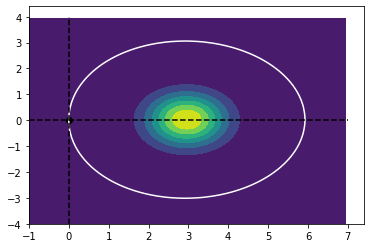

In [199]:
prob = trained_dist.prob([0.,0.])
print(float(prob))

x , y = np.mgrid[-1:7:.05, -4:4:.05]
xy = np.stack((x, y), axis=-1)

z = trained_dist.prob(xy)
plt.contourf(x,y,z)
plt.contour(x,y,z,levels=[prob],colors='w')
plt.plot([0,0],[-4,4],color='k',linestyle='dashed')
plt.plot([-1,7],[0,0],color='k',linestyle='dashed')
plt.scatter(0,0,color='k')

In [200]:
# integrate

n_points = 100000
n_pass = 0

_s = trained_dist.sample(n_points)
_v = trained_dist.prob(_s)
for val in _v:
    if val>prob:
        n_pass+=1
        
print(n_pass/n_points)

0.99995


How about something more complicated...

[ring] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {ring: 3590.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: x:0.5, y:0.5
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-30 23:24:29 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.640
[mcmc]  - Convergence of means: R-1 = 1.182309 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.510
[mcmc]  - Convergence of means: R-1 = 1.061749 after 128 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 240 samples accepted.
[mcmc]  - Acceptance rate: 0.318

[mcmc] Learn + convergence test @ 2960 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.013612 after 2368 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3040 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.009889 after 2432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3120 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.008710 after 2496 accepted steps
[mcmc]  - Convergence of bounds: R-1 = 0.126918 after 3120 accepted steps
[mcmc] The run has converged!
[mcmc] Sampling complete after 3120 accepted steps.
[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[mo

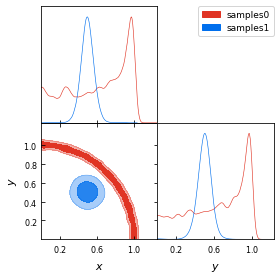

In [207]:
# Ring from before
info = {"likelihood": {"ring": gauss_ring_logp}}

info["params"] = {
    "x": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01},
    "y": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01}}

info["sampler"] = {"mcmc": {"Rminus1_stop": 0.01, "max_tries": 1000}}

# Gaussian
info1 = {
    "likelihood": {
        "gaussian_mixture": {
            "means": [0.5, 0.5],
            "covs": [[0.005, 0.0],
                     [0.0, 0.005]],
            "derived": True}},
    "params": dict([
        ("x", {
            "prior": {"min": -3, "max": 3},
            "latex": r"\alpha"}),
        ("y", {
            "prior": {"min": -3, "max": 3},
            "ref": 0,
            "proposal": 0.5,
            "latex": r"\beta"}),
        ("derived_a", {
            "latex": r"\alpha^\prime"}),
        ("derived_b", {
            "latex": r"\beta^\prime"})]),
    "sampler": {
        "mcmc": {"Rminus1_stop": 0.01, "max_tries": 1000}}}


updated_info, sampler = run(info)
updated_info1, sampler1 = run(info1)

gdsamples1 = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
gdsamples2 = MCSamplesFromCobaya(updated_info1, sampler1.products()["sample"])
gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot([gdsamples1,gdsamples2], ["x", "y"], filled=True)

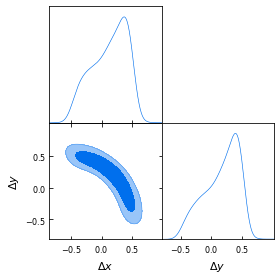

In [208]:
a1 = gdsamples1['x']
b1 = gdsamples1['y']
a2 = gdsamples2['x']
b2 = gdsamples2['y']

diff_a = np.zeros([len(a1),len(a2)])
diff_b = np.zeros([len(b1),len(b2)])

for idx1 in range(len(a1)):
    for idx2 in range(len(a2)):
        diff_a[idx1][idx2] = a1[idx1]-a2[idx2]
        pass
    pass

for idx1 in range(len(b1)):
    for idx2 in range(len(b2)):
        diff_b[idx1][idx2] = b1[idx1]-b2[idx2]
        pass
    pass
   
diff_a = diff_a.flatten()
diff_b = diff_b.flatten()

from getdist.mcsamples import MCSamples

diff = MCSamples(samples = [diff_a,diff_b],names=['da','db'], labels=['\\Delta x','\\Delta y'])

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(diff, ["da", "db"], filled=True)

Starting training...
Begin Epoch 0...
End Epoch 0. Loss = -0.44700. Validation loss = -0.45565
Begin Epoch 1...
End Epoch 1. Loss = -0.46456. Validation loss = -0.44585
Begin Epoch 2...
End Epoch 2. Loss = -0.46689. Validation loss = -0.44895


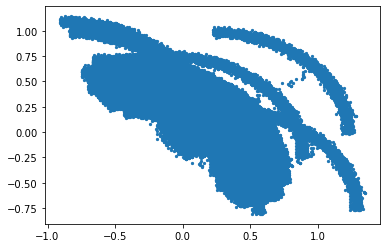

In [218]:
def plot(x,y,title):
    plt.figure()
    plt.title(title)
    plt.hist2d(x,y,bins=[np.linspace(-3,3,100),np.linspace(-3,3,100)])

trained_dist = tfd.MultivariateNormalDiag(loc=[0.,0.], scale_diag=[1.,1.])

x = diff['da']
y = diff['db']

trained_dist = train(trained_dist, x, y, n_maf=3, n=len(x), batch_size=1000, permute=False, n_epochs=3)# The result should not depend on the change of variables z1<->z2 

#tx,ty,txy=sample(100000,trained_dist)
#plot(tx,ty,'result')
#
l_bijectors = np.array(trained_dist.bijector.bijectors)#np.flipud()
#step_data=txy
#
#maf=len(l_bijectors)
#for bij in l_bijectors:
#    step_data = bij.inverse(step_data)
#    plot(step_data[...,0],step_data[...,1],'Bijector: {}'.format(maf))
#    maf -= 1

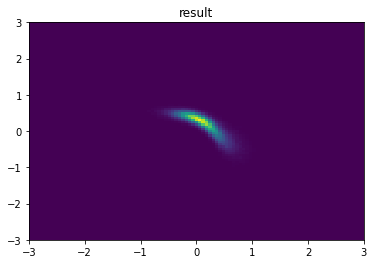

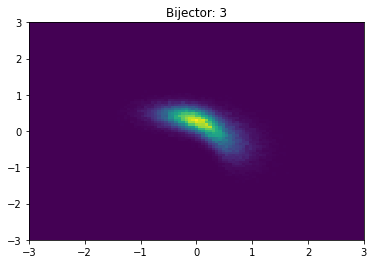

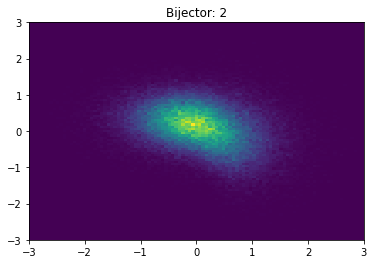

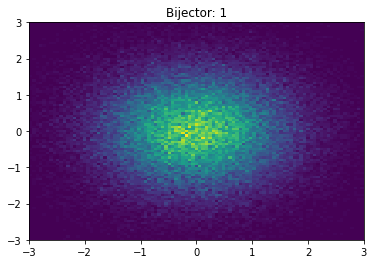

In [219]:
tx,ty,txy=sample(100000,trained_dist)
plot(tx,ty,'result')
step_data=txy

maf=len(l_bijectors)
for bij in l_bijectors:
    step_data = bij.inverse(step_data)
    plot(step_data[...,0],step_data[...,1],'Bijector: {}'.format(maf))
    maf -= 1

0.007975663989782333


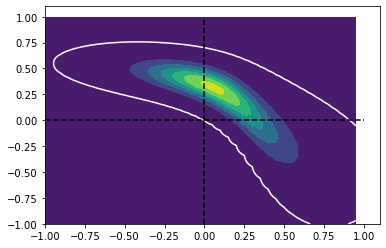

In [226]:
prob = trained_dist.prob([0.,0.])
print(float(prob))

x , y = np.mgrid[-1:1:.05, -1:1:.01]
xy = np.stack((x, y), axis=-1)

z = trained_dist.prob(xy)
plt.contourf(x,y,z)
plt.contour(x,y,z,levels=[prob],colors='w')
plt.plot([0,0],[-1,1],color='k',linestyle='dashed')
plt.plot([-1,1],[0,0],color='k',linestyle='dashed')
plt.scatter([0],[0],color='k',s=10)

In [221]:
# integrate

n_points = 100000
n_pass = 0

_s = trained_dist.sample(n_points)
_v = trained_dist.prob(_s)
for val in _v:
    if val>prob:
        n_pass+=1
        
print(n_pass/n_points)

0.99771
